# Test 1 : compare no sigmut, only sigmut, and biomarkers + sigmut
Here, we compare, for GCN classifier with Tumour type pre-graph, the case where we use no mutational signatures, only mutational signatures, and the combination of mutational signatures and biomarkers. No normalization of mutational signatures.

## Table of contents

1. [No sigmut](#1-no-sigmut)
2. [Only sigmut](#2-only-sigmut)
2. [Sigmut + biomarkers](#2-not-normalized-sigmut)
4. [Evaluate performances](#4-performances)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from evaluation.ClassificationMetrics import ClassificationMetrics

from manage.GCNClassifierTrainTestManager import GCNClassifierTrainTestManager

from models.GCNClassifier import GCNClassifier

from sklearn.preprocessing import StandardScaler

from utils.preProcessing import preProcessing

## 1. No mutational signatures

In [2]:
# Reading
df_no_sigmut = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_no_sigmut = df_no_sigmut.loc[df_no_sigmut["Cohort"] == "Naive"]

# Drop NaN values
df_no_sigmut = preProcessing.delete_nan_values(df_no_sigmut)

# Relabel patients
t = 183 # 6 months
df_no_sigmut = preProcessing.relabel_patients(df_no_sigmut, "Progression_1","Time to progression (days)",t)

# Extract features and label
features_name_no_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]
X_no_sigmut = df_no_sigmut.loc[:,features_name_no_sigmut].to_numpy()
y_no_sigmut = df_no_sigmut["Progression_1"].to_numpy()

# Normalize features
X_no_sigmut = preProcessing.normalize_data(X_no_sigmut)

In [3]:
# Build group (all in same group)
group_no_sigmut = df_no_sigmut["Tumour type"].to_numpy()

In [4]:
# Instanciate GCN classifier with its train test manager
gcn_clf_no_sigmut = GCNClassifier(len(features_name_no_sigmut))
gcn_manager_no_sigmut = GCNClassifierTrainTestManager(gcn_clf_no_sigmut)
n_epochs = 50

In [5]:
# Make the leave one out cross validation
scores_no_sigmut, classes_no_sigmut, train_loss_no_sigmut, val_loss_no_sigmut, std_train_loss_no_sigmut, std_val_loss_no_sigmut, params_conv_no_sigmut, params_fc_no_sigmut = gcn_manager_no_sigmut.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut, n_epochs, "euclidean",3)

## 2. Only sigmut

In [6]:
# Reading
df_only_sigmut = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_only_sigmut = df_only_sigmut.loc[df_only_sigmut["Cohort"] == "Naive"]

# Drop NaN values
df_only_sigmut = preProcessing.delete_nan_values(df_only_sigmut)

# Relabel patients
df_only_sigmut = preProcessing.relabel_patients(df_only_sigmut, "Progression_1","Time to progression (days)",t)

# Extract features and label
features_name_only_sigmut = ["SBS1","SBS2","SBS3","SBS4","SBS5","SBS7a","SBS7b","SBS7c","SBS7d","SBS8","SBS10a","SBS10b","SBS10c","SBS13","SBS15","SBS17a","SBS17b","SBS18","SBS31","SBS35","SBS36","SBS37","SBS38","SBS40","SBS44","SBS4426","ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12","ID13","ID14","ID15","ID16","ID17","ID18"]
X_only_sigmut = df_only_sigmut.loc[:,features_name_only_sigmut].to_numpy()
y_only_sigmut = df_only_sigmut["Progression_1"].to_numpy()

In [7]:
# Build group (all in same group)
group_only_sigmut = df_only_sigmut["Tumour type"].to_numpy()

In [8]:
# Instanciate GCN classifier with its train test manager
gcn_clf_only_sigmut = GCNClassifier(len(features_name_only_sigmut))
gcn_manager_only_sigmut = GCNClassifierTrainTestManager(gcn_clf_only_sigmut)

In [9]:
# Make the leave one out cross validation
scores_only_sigmut, classes_only_sigmut, train_loss_only_sigmut, val_loss_only_sigmut, std_train_loss_only_sigmut, std_val_loss_only_sigmut, params_conv_only_sigmut, params_fc_only_sigmut = gcn_manager_only_sigmut.leave_one_out_cross_validation(X_only_sigmut, y_only_sigmut, group_only_sigmut, n_epochs, "euclidean",3)

## 3. Biomarkers + sigmut

In [10]:
# Reading
df_comb = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_comb = df_comb.loc[df_comb["Cohort"] == "Naive"]

# Drop NaN values
df_comb = preProcessing.delete_nan_values(df_comb)

# Re-label patients
df_comb = preProcessing.relabel_patients(df_comb, "Progression_1","Time to progression (days)",t)

# Select features
features_name_comb = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","SBS1","SBS2","SBS3","SBS4","SBS5","SBS7a","SBS7b","SBS7c","SBS7d","SBS8","SBS10a","SBS10b","SBS10c","SBS13","SBS15","SBS17a","SBS17b","SBS18","SBS31","SBS35","SBS36","SBS37","SBS38","SBS40","SBS44","SBS4426","ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12","ID13","ID14","ID15","ID16","ID17","ID18"]
features_to_normalize = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]

# Normalize features except mutational signatures
df_comb.loc[:,features_to_normalize] = StandardScaler().fit_transform(df_comb.loc[:,features_to_normalize].to_numpy())

# Extract features
X_comb = df_comb.loc[:,features_name_comb].to_numpy()

# Numerize label
y_comb = df_comb["Progression_1"].to_numpy()

In [11]:
# Build group (all in same group)
group_comb = df_comb["Tumour type"].to_numpy()

In [12]:
# Instanciate GCN classifier with its train test manager
gcn_clf_comb = GCNClassifier(len(features_name_comb))
gcn_manager_comb = GCNClassifierTrainTestManager(gcn_clf_comb)

In [13]:
# Make the leave one out cross validation
scores_comb, classes_comb, train_loss_comb, val_loss_comb, std_train_loss_comb, std_val_loss_comb, params_conv_comb, params_fc_comb = gcn_manager_comb.leave_one_out_cross_validation(X_comb, y_comb, group_comb, n_epochs, "euclidean",3)

## 4. Evaluate performances

In [14]:
# No sigmut
fpr_no_sigmut, tpr_no_sigmut, thresholds_no_sigmut = ClassificationMetrics.compute_roc_curve(y_no_sigmut, scores_no_sigmut)
sensitivity_no_sigmut, specificity_no_sigmut = ClassificationMetrics.compute_sensitivity_specificity(y_no_sigmut, classes_no_sigmut)

# only sigmut
fpr_only_sigmut, tpr_only_sigmut, thresholds_only_sigmut = ClassificationMetrics.compute_roc_curve(y_only_sigmut, scores_only_sigmut)
sensitivity_only_sigmut, specificity_only_sigmut = ClassificationMetrics.compute_sensitivity_specificity(y_only_sigmut, classes_only_sigmut)

# Comb sigmut + other biomarkers
fpr_comb, tpr_comb, thresholds_comb = ClassificationMetrics.compute_roc_curve(y_comb, scores_comb)
sensitivity_comb, specificity_comb = ClassificationMetrics.compute_sensitivity_specificity(y_comb, classes_comb)

In [15]:
# No sigmut
features_importance_no_sigmut = np.absolute(np.mean([np.mean(params_conv_no_sigmut[i].detach().numpy(),axis=1) for i in range(len(params_conv_no_sigmut))],axis=0))
index_sort = np.argsort(features_importance_no_sigmut)
features_importance_sorted_no_sigmut = features_importance_no_sigmut[index_sort]
features_name_sorted_no_sigmut = np.array(features_name_no_sigmut)[index_sort]

# Only sigmut
features_importance_only_sigmut = np.absolute(np.mean([np.mean(params_conv_only_sigmut[i].detach().numpy(),axis=1) for i in range(len(params_conv_only_sigmut))],axis=0))
index_sort = np.argsort(features_importance_only_sigmut)
features_importance_sorted_only_sigmut = features_importance_only_sigmut[index_sort]
features_name_sorted_only_sigmut = np.array(features_name_only_sigmut)[index_sort]

# Comb sigmut + other biomarkers
features_importance_comb = np.absolute(np.mean([np.mean(params_conv_comb[i].detach().numpy(),axis=1) for i in range(len(params_conv_comb))],axis=0))
index_sort = np.argsort(features_importance_comb)
features_importance_sorted_comb = features_importance_comb[index_sort]
features_name_sorted_comb = np.array(features_name_comb)[index_sort]

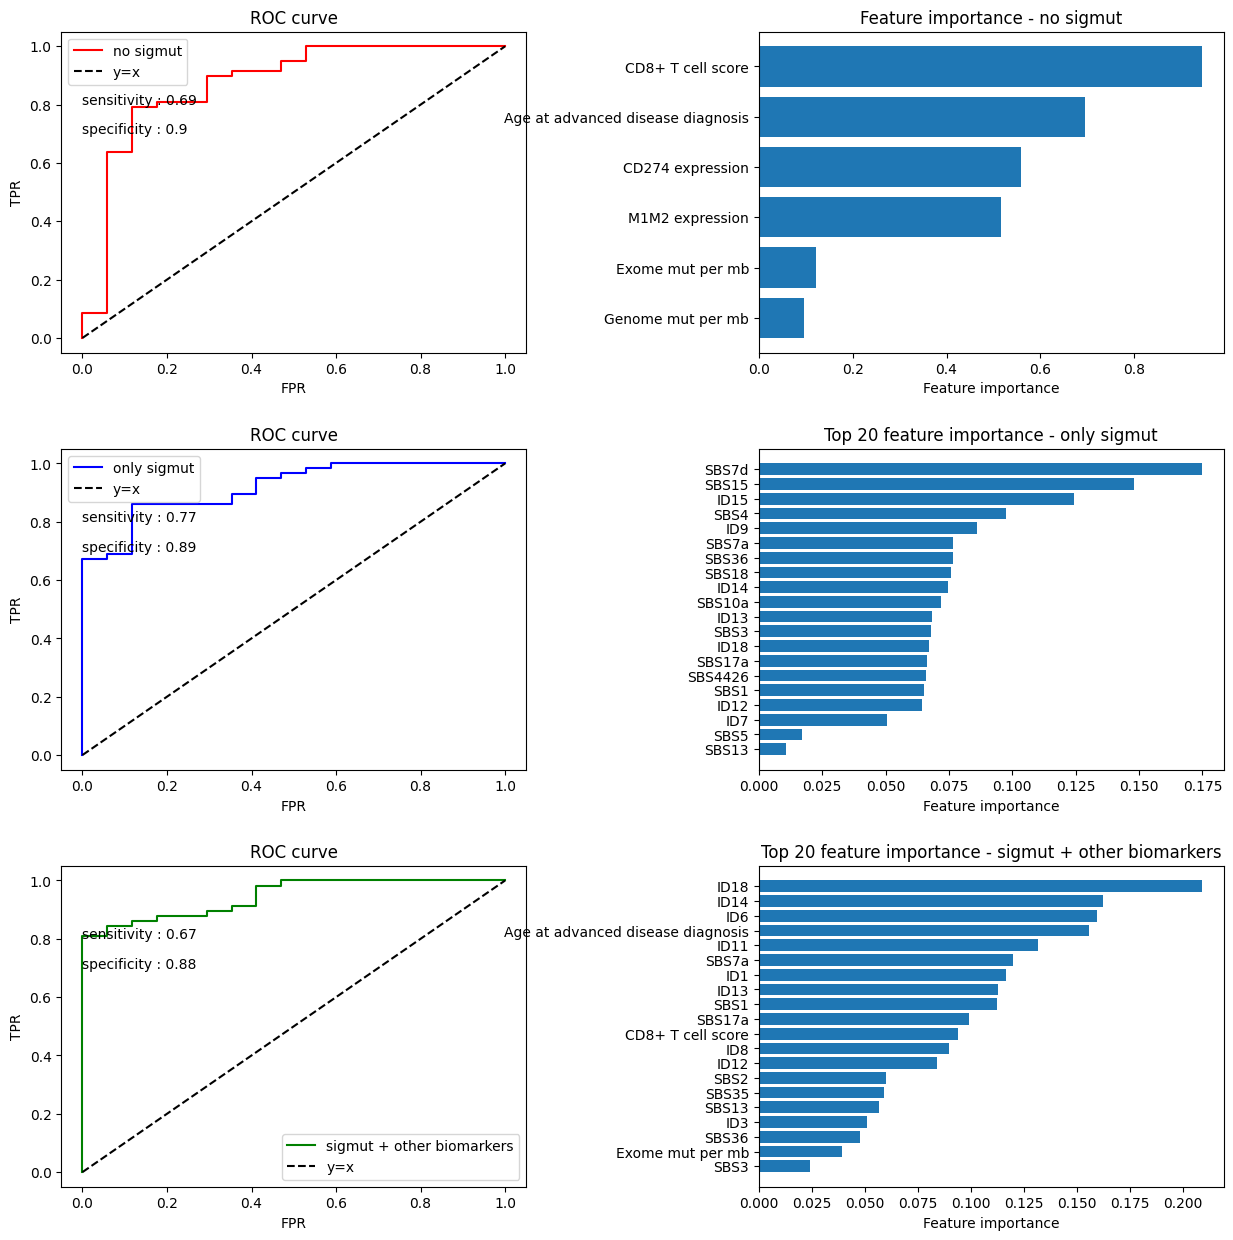

In [16]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
x = np.linspace(0,1,100)

# NO SIGMUT
# ROC curve
ax[0,0].plot(fpr_no_sigmut, tpr_no_sigmut, color='red',label='no sigmut')
ax[0,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,0].set_xlabel('FPR')
ax[0,0].set_ylabel('TPR')
ax[0,0].set_title('ROC curve')
ax[0,0].text(0,0.8,f"sensitivity : {sensitivity_no_sigmut}")
ax[0,0].text(0,0.7,f"specificity : {specificity_no_sigmut}")
ax[0,0].legend()

# Feature importance
ax[0,1].barh(features_name_sorted_no_sigmut,features_importance_sorted_no_sigmut)
ax[0,1].set_xlabel("Feature importance")
ax[0,1].set_title("Feature importance - no sigmut")

# ONLY SIGMUT
# ROC curve
ax[1,0].plot(fpr_only_sigmut, tpr_only_sigmut, color='blue',label='only sigmut')
ax[1,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[1,0].set_xlabel('FPR')
ax[1,0].set_ylabel('TPR')
ax[1,0].set_title('ROC curve')
ax[1,0].text(0,0.8,f"sensitivity : {sensitivity_only_sigmut}")
ax[1,0].text(0,0.7,f"specificity : {specificity_only_sigmut}")
ax[1,0].legend()

# Feature importance
ax[1,1].barh(features_name_sorted_only_sigmut[0:20],features_importance_sorted_only_sigmut[0:20])
ax[1,1].set_xlabel("Feature importance")
ax[1,1].set_title("Top 20 feature importance - only sigmut")

# COMB SIGMUT + OTHER BIOMARKERS
# ROC curve
ax[2,0].plot(fpr_comb, tpr_comb, color='green',label='sigmut + other biomarkers')
ax[2,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[2,0].set_xlabel('FPR')
ax[2,0].set_ylabel('TPR')
ax[2,0].set_title('ROC curve')
ax[2,0].text(0,0.8,f"sensitivity : {sensitivity_comb}")
ax[2,0].text(0,0.7,f"specificity : {specificity_comb}")
ax[2,0].legend()

# Feature importance
ax[2,1].barh(features_name_sorted_comb[0:20],features_importance_sorted_comb[0:20])
ax[2,1].set_xlabel("Feature importance")
ax[2,1].set_title("Top 20 feature importance - sigmut + other biomarkers")

plt.subplots_adjust(hspace=0.3, wspace=0.5)

### Train loss and validation loss

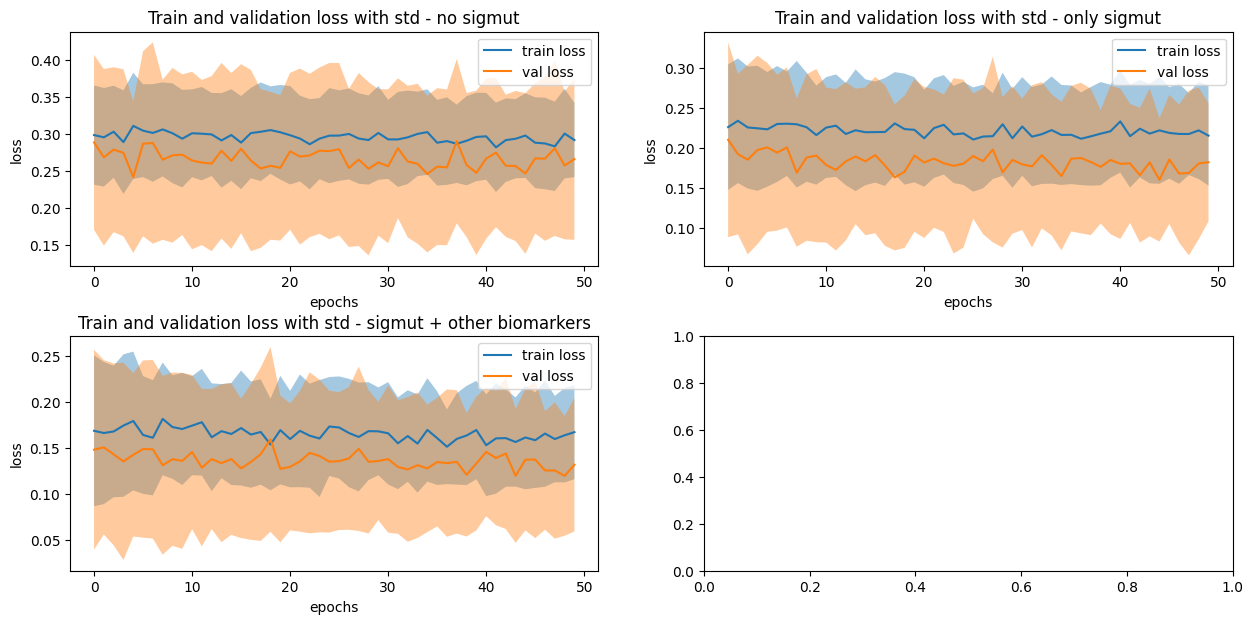

In [17]:
epochs = [k for k in range(n_epochs)]

fig, ax = plt.subplots(2,2,figsize=(15,7))

# No sigmut :
ax[0,0].plot(epochs, train_loss_no_sigmut,label='train loss')
ax[0,0].fill_between(epochs, train_loss_no_sigmut-std_train_loss_no_sigmut, train_loss_no_sigmut+std_train_loss_no_sigmut, alpha=0.4)
ax[0,0].plot(epochs, val_loss_no_sigmut,label='val loss')
ax[0,0].fill_between(epochs, val_loss_no_sigmut-std_val_loss_no_sigmut, val_loss_no_sigmut+std_val_loss_no_sigmut,alpha=0.4)
ax[0,0].set_xlabel('epochs')
ax[0,0].set_ylabel('loss')
ax[0,0].set_title('Train and validation loss with std - no sigmut')
ax[0,0].legend()

# Only sigmut :
ax[0,1].plot(epochs, train_loss_only_sigmut, label='train loss')
ax[0,1].fill_between(epochs, train_loss_only_sigmut-std_train_loss_only_sigmut, train_loss_only_sigmut+std_train_loss_only_sigmut, alpha=0.4)
ax[0,1].plot(epochs, val_loss_only_sigmut,label='val loss')
ax[0,1].fill_between(epochs, val_loss_only_sigmut-std_val_loss_only_sigmut, val_loss_only_sigmut+std_val_loss_only_sigmut,alpha=0.4)
ax[0,1].set_xlabel('epochs')
ax[0,1].set_ylabel('loss')
ax[0,1].set_title('Train and validation loss with std - only sigmut')
ax[0,1].legend()

# Sigmut + other biomarkers :
ax[1,0].plot(epochs, train_loss_comb, label='train loss')
ax[1,0].fill_between(epochs, train_loss_comb-std_train_loss_comb, train_loss_comb+std_train_loss_comb, alpha=0.4)
ax[1,0].plot(epochs, val_loss_comb,label='val loss')
ax[1,0].fill_between(epochs, val_loss_comb-std_val_loss_comb, val_loss_comb+std_val_loss_comb,alpha=0.4)
ax[1,0].set_xlabel('epochs')
ax[1,0].set_ylabel('loss')
ax[1,0].set_title('Train and validation loss with std - sigmut + other biomarkers')
ax[1,0].legend()

plt.subplots_adjust(hspace=0.3)